# 3.8 Portfolio risk, log-normal. Effect of $\lambda$

[1] "numSd/exact"      "1,01734309101254" "numMean/exact"    "1,0004236163077" 
[1] "qEpsilon/mean"    "1,98152849432879" "2,64079564846445"
[1] "numSd/exact"      "3,14056850550406" "numMean/exact"    "10,0086493293884"
[1] "qEpsilon/mean"    "1,28291026710772" "1,42310250056178"


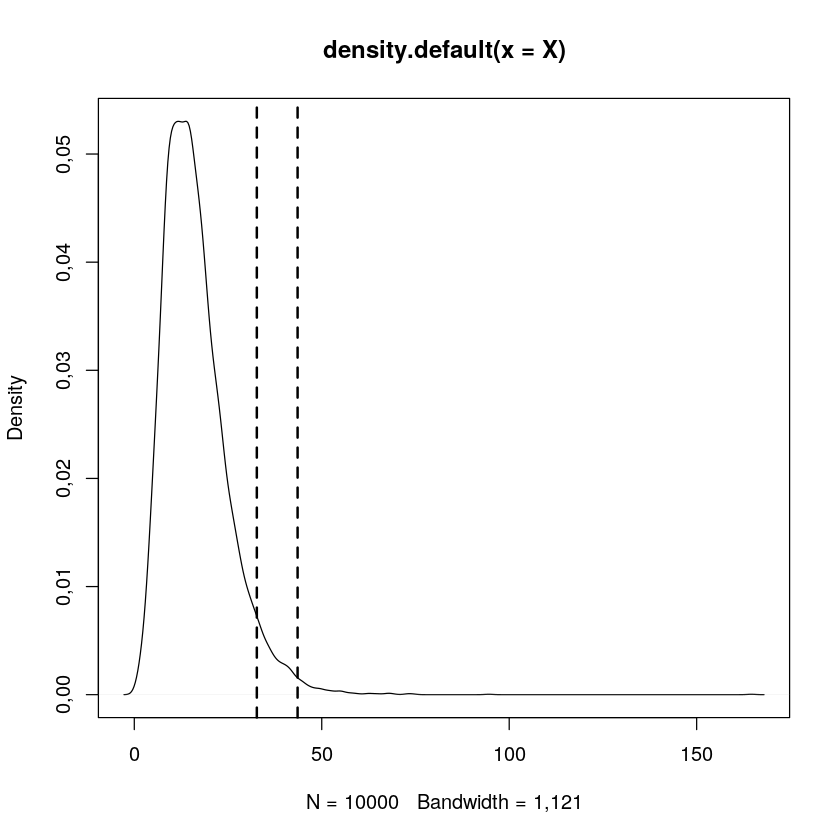

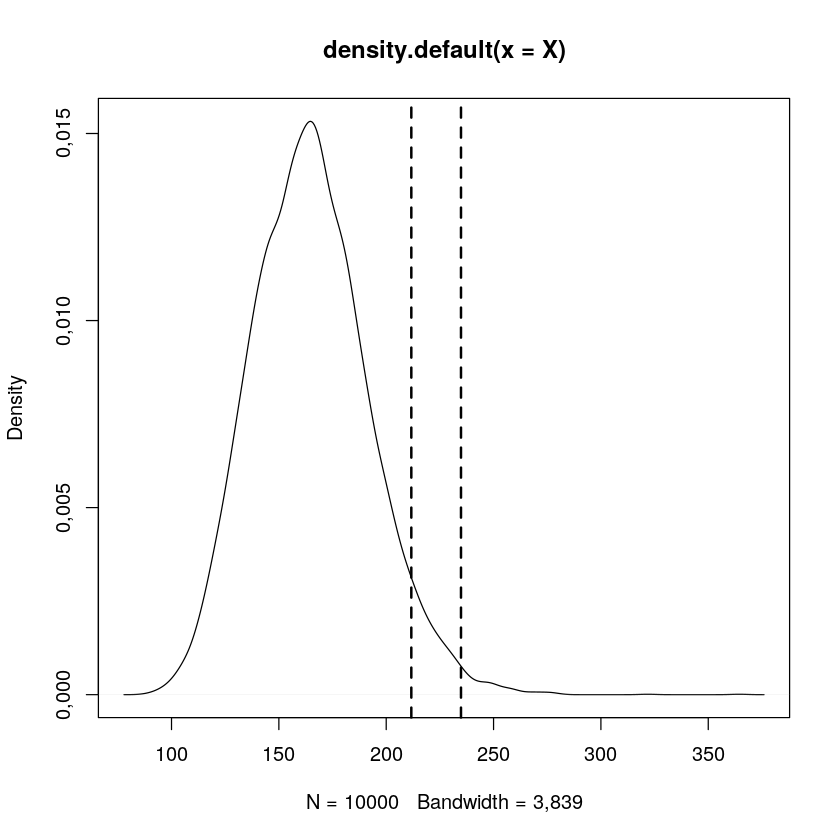

In [12]:
m = 10000
lambdas = c(10, 100)
xsi = 0
sigma = 1


portFolioRisk = function(m, lambda, xsi, sigma){
    X = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        Z = rlnorm(N[i], xsi, sigma) # Where can this be found in the book?
        X[i] = sum(Z)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    exactE = 16.487
    exactSd = 8.596
    print(c('numSd/exact',numericalSd/exactSd, 'numMean/exact',numericalMean/exactE))
    return(list(numericalMean, numericalSd, X))
}

for (lambda in lambdas){
    out = portFolioRisk(m, lambda, xsi, sigma)
    mean = unlist(out[1])
    sd = out[2]
    X = unlist(out[3])

    epsilon = c(0.05, 0.01)
    qEpsilon = sort(X)[(1-epsilon)*m]
    qEpsilonToMean = qEpsilon/mean
    print(c('qEpsilon/mean', qEpsilonToMean))
    #print(c('qEpsilon', qEpsilon))
    plot(density(X))
    abline(v = qEpsilon[1], lty=2, lwd=2)
    abline(v = qEpsilon[2], lty=2, lwd=2)
}


Increasing $\lambda$ from 10 to 100 increases the loss. The pdf is shiftet to the right. <br>

The percentiles relative to the mean values goes down when $\lambda$ is increased from 10 to 100.  <br>

From my notes p. 26 I have $E(N) = \lambda$. This corresponds to the results here, since the mean increases with $\lambda$.   <br>

<mark>Why does relationship percentiles to mean go down? <mark>
<br>
Simon's solution: " If we increase lambda (the rate at which claims occur),  the mode of the density increases, and in addition the  distribution has heavier tails." <br>
Me: higher lambda, higher mean, ratio down.
    
# 3.9 Portfolio risk, Gamma distribution

[1] "Lambda: " "10"      
[1] "numSd/exact"       "1.00710903388569"  "numMean/exact"    
[4] "0.997724380420561"
[1] "qEpsilon/mean"    "1.60727498428661" "1.91766000727085"


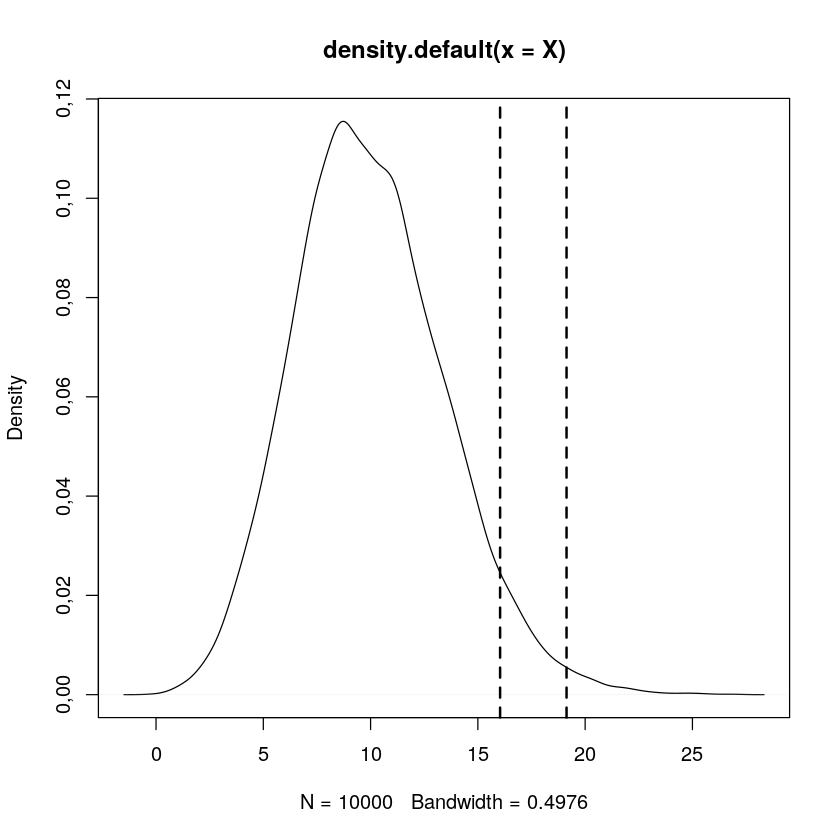

In [4]:
m = 10000
lambdas = c(10)#, 100)
xsi = 1
#sigma = 1
alpha = 5


portFolioRisk = function(m, lambda, xsi, sigma){
    X = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        Z = xsi*rgamma(N[i], alpha)/alpha
        X[i] = sum(Z)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    exactE = 10
    exactSd = 3.464
    print(c('Lambda: ', lambda))
    print(c('numSd/exact',numericalSd/exactSd, 'numMean/exact',numericalMean/exactE))
    return(list(numericalMean, numericalSd, X))
}

for (lambda in lambdas){
    out = portFolioRisk(m, lambda, xsi, sigma)
    mean = unlist(out[1])
    sd = out[2]
    X = unlist(out[3])

    epsilon = c(0.05, 0.01)
    qEpsilon = sort(X)[(1-epsilon)*m]
    qEpsilonToMean = qEpsilon/mean
    print(c('qEpsilon/mean', qEpsilonToMean))
    #print(c('qEpsilon', qEpsilon))
    plot(density(X))
    abline(v = qEpsilon[1], lty=2, lwd=2)
    abline(v = qEpsilon[2], lty=2, lwd=2)
}

The percentiles relative to the means are smaller here compared to the log-normal distribution case in the previous exercise. The Gamma distribution is more copmressed than the log-normal.

# 3.10 Log-normal, compensations

In [5]:
m = 100000
xsi = 0
sigma = 1
a = 0
b = 10000
meanExact = 1.649
sdExact = 2.161


Z = rlnorm(m, xsi, sigma)
H = pmin(pmax(Z-a, 0), b)

meanNumerical = mean(H)
sdNumerical = sd(H)

print(c('mean Num/exact', meanNumerical/meanExact,'sd Num/exact',sdNumerical/sdExact))


[1] "mean Num/exact"    "0,996111679751745" "sd Num/exact"     
[4] "0,991516143769599"


# 3.11 Reinsurance, a x b, gamma

[1] "a: " "0,5"
[1] "Mean "            "4,89399445402491"
[1] "qEpsilon"         "7,5"              "8,75867165278635"
[1] "qEpsilon/mean"    "1,53249049839684" "1,78967747819638"
[1] "a: " "1"  
[1] "Mean "            "8,24839707058993"
[1] "qEpsilon"         "13,0059484388513" "15,1814329309375"
[1] "qEpsilon/mean"    "1,57678495925282" "1,84053129365797"


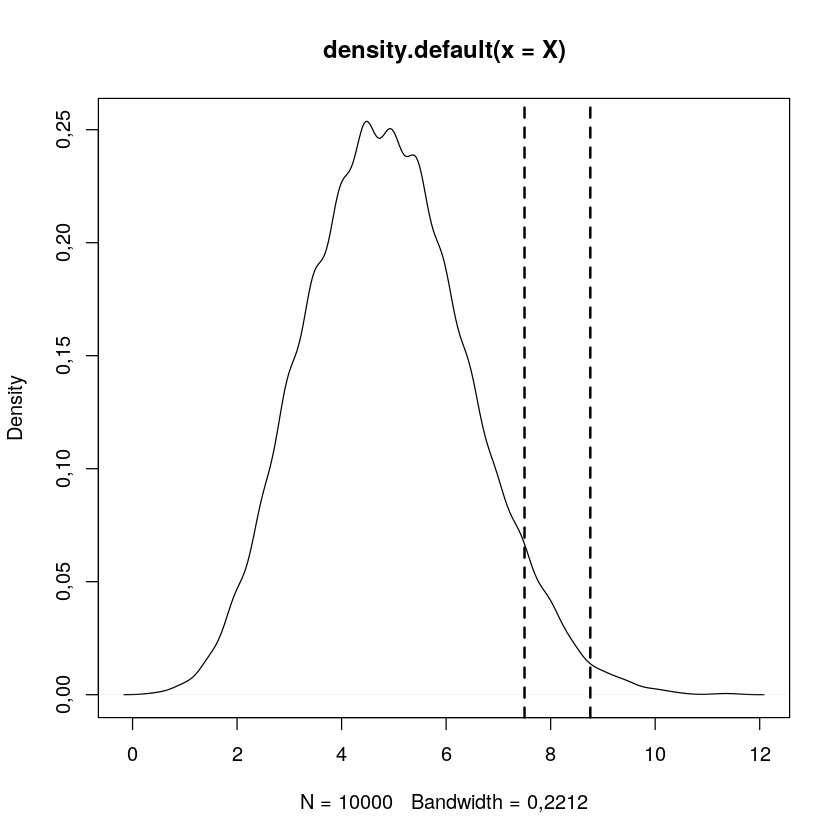

[1] "a: " "2"  
[1] "Mean "           "9,9364386590745"
[1] "qEpsilon"         "15,8981856855318" "18,6905076458228"
[1] "qEpsilon/mean"    "1,59998830879036" "1,88100669536702"


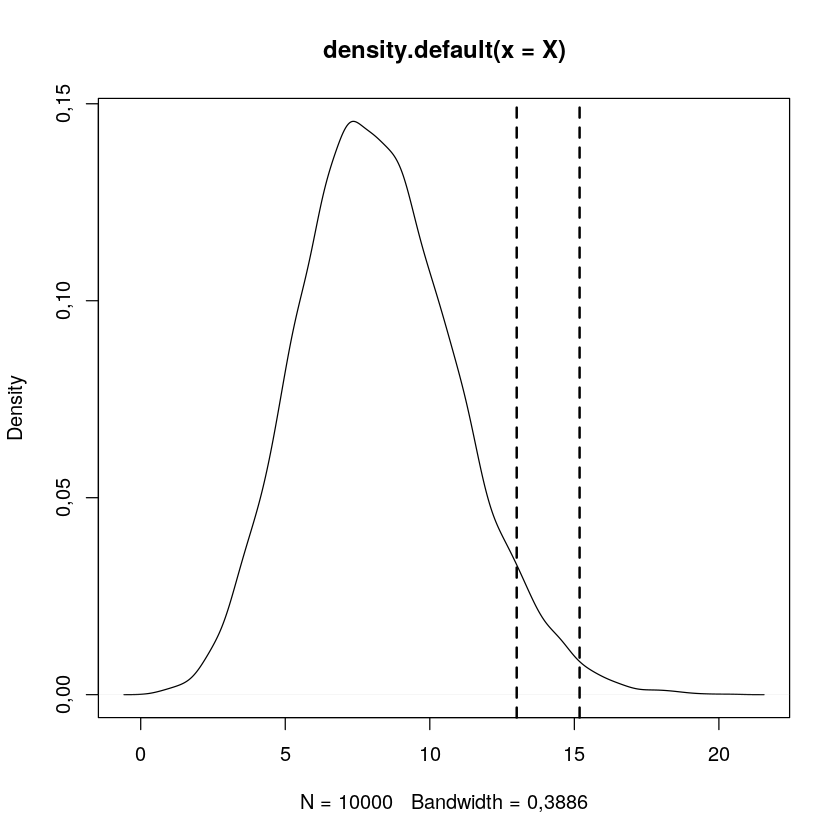

[1] "a: " "100"
[1] "Mean "            "9,97182281100159"
[1] "qEpsilon"         "16,0852485928846" "18,8137302287215"
[1] "qEpsilon/mean"   "1,6130700372191" "1,8866891826402"


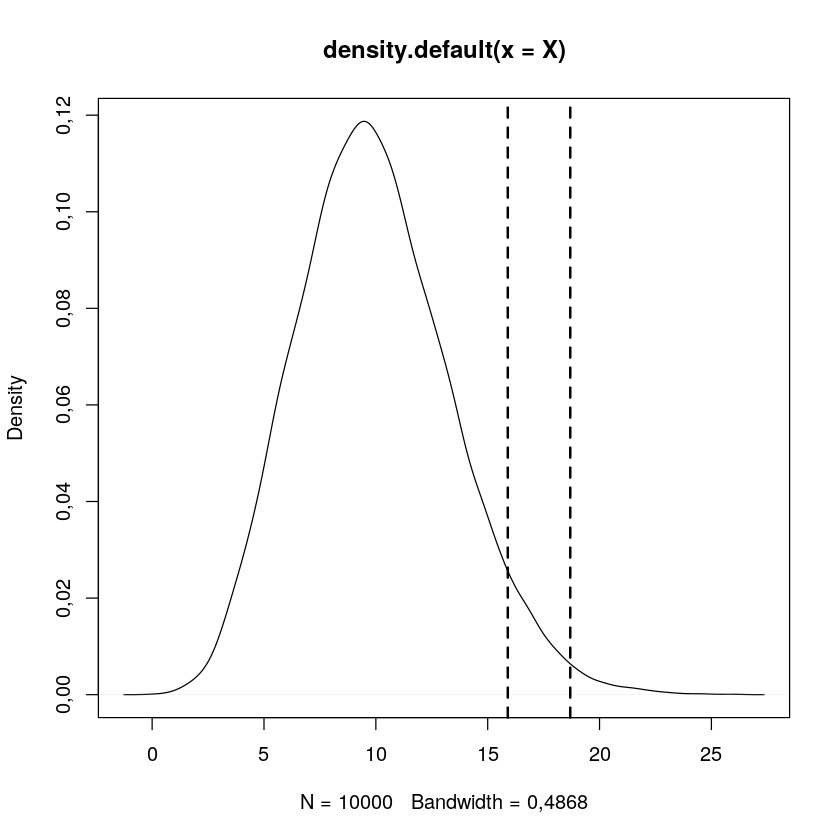

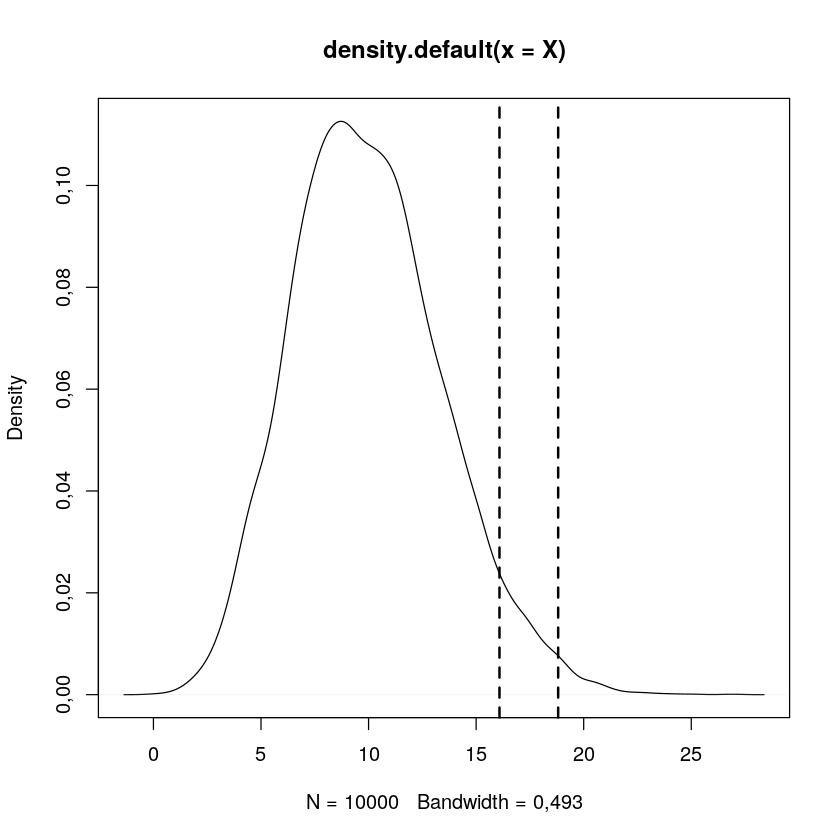

In [6]:
m = 10000
lambdas = c(10)#, 100)
xsi = 1
#sigma = 1
as = c(.5, 1, 2, 100)
alpha = 5
b = 100

portFolioRisk = function(m, lambda, xsi, sigma, a, b){
    X = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        Z = xsi*rgamma(N[i], alpha)/alpha
        Zre = pmin(pmax(Z-a, 0), b)
        X[i] = sum(Z - Zre)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    exactE = 10
    exactSd = 3.464
    print(c('a: ', a))
    #print(c('numSd/exact',numericalSd/exactSd, 'numMean/exact',numericalMean/exactE))
    return(list(numericalMean, numericalSd, X))
}

for (a in as){
    out = portFolioRisk(m, lambda, xsi, sigma, a, b)
    mean = unlist(out[1])
    sd = out[2]
    X = unlist(out[3])

    epsilon = c(0.05, 0.01)
    qEpsilon = sort(X)[(1-epsilon)*m]
    qEpsilonToMean = qEpsilon/mean
    print(c('Mean ', mean))
    print(c('qEpsilon', qEpsilon))
    print(c('qEpsilon/mean', qEpsilonToMean))
    #print(c('qEpsilon', qEpsilon))
    plot(density(X))
    abline(v = qEpsilon[1], lty=2, lwd=2)
    abline(v = qEpsilon[2], lty=2, lwd=2)
}

Mean increases in the beginning with a. <br>

Percentiles to mean pretty stable. <br>

For $\lambda=10$ mean and avg was 10 and 3.6 in exercise 3.9 without re-insurance. Percentile to means were 1.6 and 1.9. For the lowest a, the mean is much lower in the re-insurance scenario. For the lowest a the percentlie to mean is a bit lower in the case of reinsurance, descibing a tighter distribution.

<mark>Inutuition: I was not sure about this. I think the intuition, is that the higher deductible that must be paid to the reinsurer, the higher losses the cedent can expect.

# 3.12 Same as 3.11. Reinsurer point of view.

[1] "a: " "0,5"
[1] "Mean "           "5,1141007101588"
[1] "qEpsilon"         "8,84346135727064" "10,8736337504725"
[1] "qEpsilon/mean"    "1,72923097499894" "2,12620641765478"
[1] "a: " "1"  
[1] "Mean "            "1,76213061227277"
[1] "qEpsilon"         "3,84422354199742" "5,14979931655144"
[1] "qEpsilon/mean"    "2,18157695872453" "2,92248445188141"


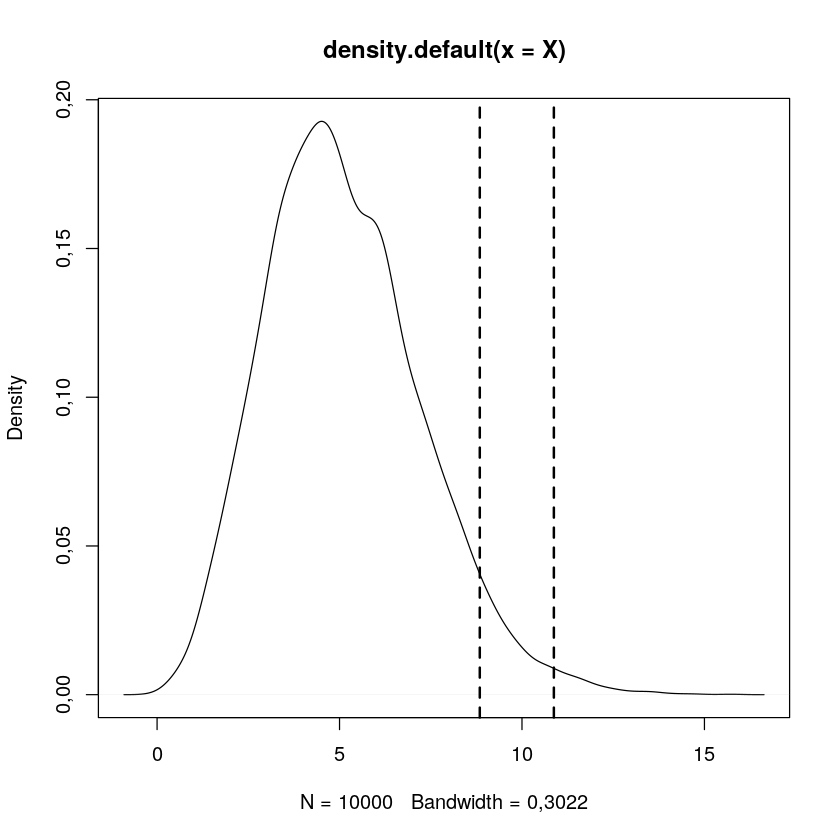

[1] "a: " "2"  
[1] "Mean "              "0,0890058903482593"
[1] "qEpsilon"          "0,564309393703876" "1,1052539407093"  
[1] "qEpsilon/mean"    "6,34013537189353" "12,4177617502021"


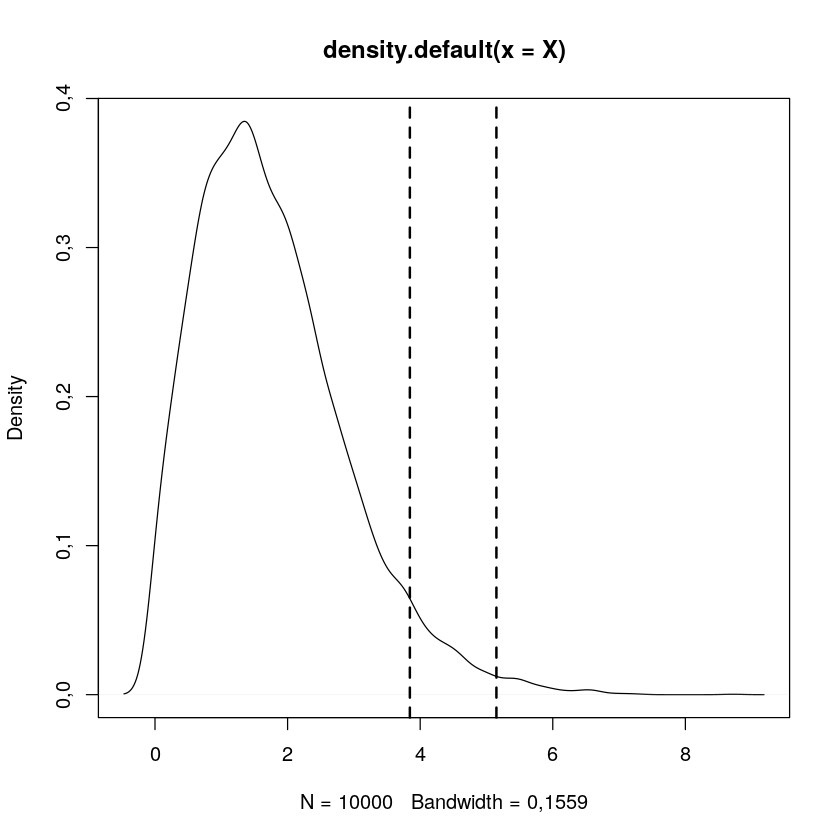

[1] "a: " "100"
[1] "Mean " "0"    
[1] "qEpsilon" "0"        "0"       
[1] "qEpsilon/mean" "NaN"           "NaN"          


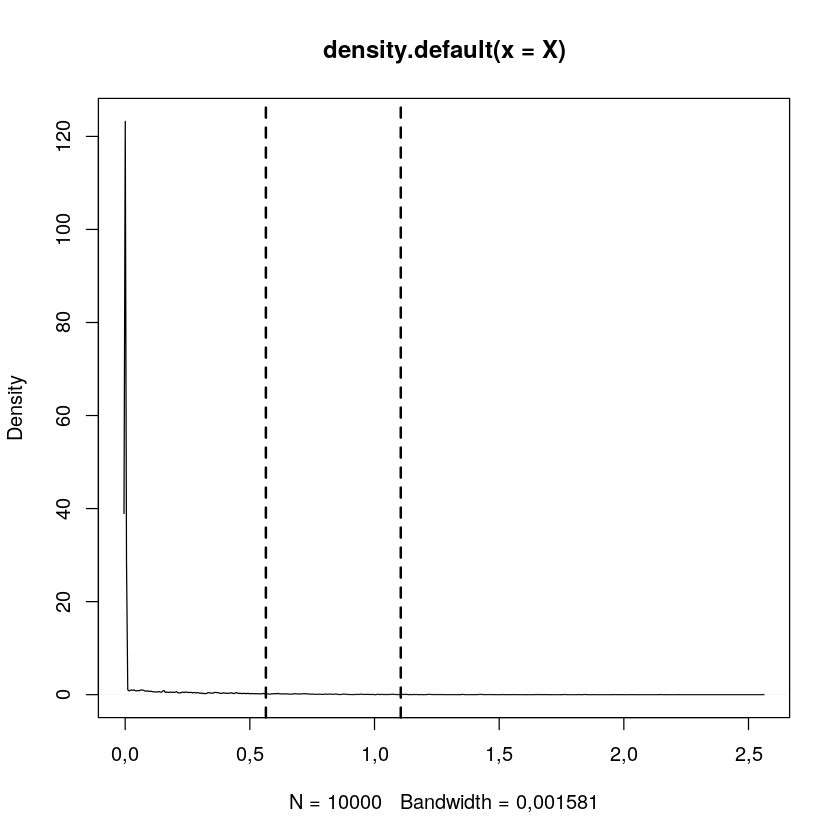

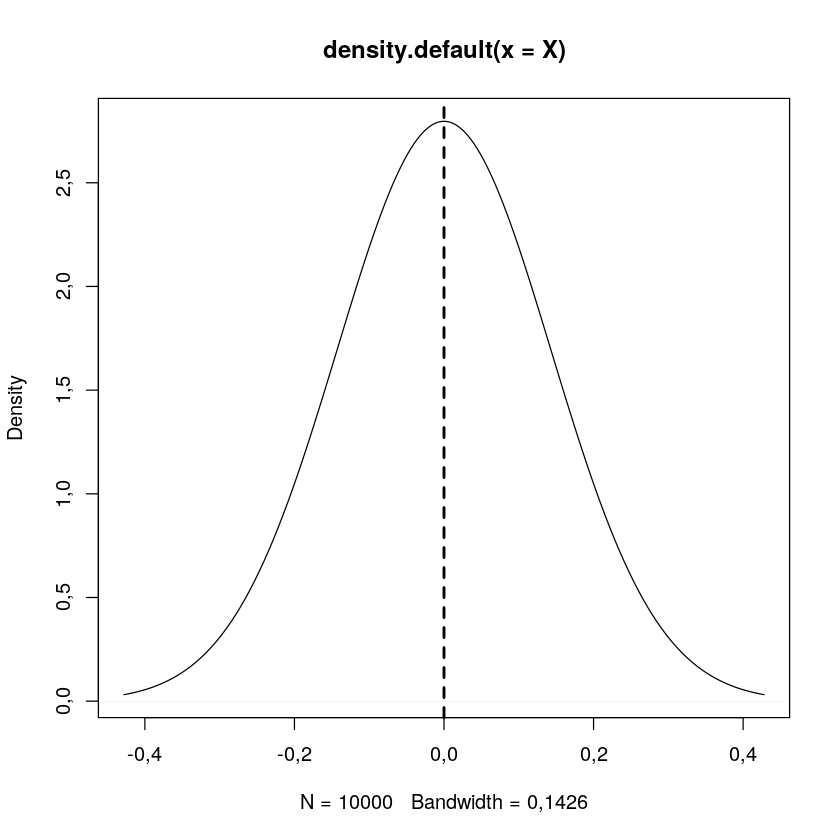

In [54]:
m = 10000
lambdas = c(10)#, 100)
xsi = 1
#sigma = 1
as = c(.5, 1, 2, 100)
alpha = 5 
b = 100

portFolioRisk = function(m, lambda, xsi, sigma, a, b){
    X = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        Z = xsi*rgamma(N[i], alpha)/alpha
        Zre = pmin(pmax(Z-a, 0), b)
        X[i] = sum(Zre)
    }
    numericalMean = mean(X)
    numericalSd = sd(X)
    exactE = 10
    exactSd = 3.464
    print(c('a: ', a))
    #print(c('numSd/exact',numericalSd/exactSd, 'numMean/exact',numericalMean/exactE))
    return(list(numericalMean, numericalSd, X))
}

for (a in as){
    out = portFolioRisk(m, lambda, xsi, sigma, a, b)
    mean = unlist(out[1])
    sd = out[2]
    X = unlist(out[3])

    epsilon = c(0.05, 0.01)
    qEpsilon = sort(X)[(1-epsilon)*m]
    qEpsilonToMean = qEpsilon/mean
    print(c('Mean ', mean))
    print(c('qEpsilon', qEpsilon))
    print(c('qEpsilon/mean', qEpsilonToMean))
    plot(density(X))
    abline(v = qEpsilon[1], lty=2, lwd=2)
    abline(v = qEpsilon[2], lty=2, lwd=2)
}

The higher deductible, a, the lower loss for the Reinsurer.

# 3.13 a x b reinsurance, portfolio

In [63]:
m = 10000
lambdas = c(10)#, 100)
xsi = 0
sigma = 1
#sigma = 1
as = c(15)
alpha = 5
b = 25
portFolioRisk = function(m, lambda, xsi, sigma, a, b){
    X = 1:m*0
    #Zre = 1:m*0
    N = rpois(m, lambda)
    for (i in 1:m){
        Z = rlnorm(N[i], xsi, sigma)
        X[i] = sum(Z)
    Xre = pmin(pmax(X-a, 0), b)
    Xce = X - Xre
    }
    numericalMean = mean(Xre)
    numericalSd = sd(Xre)
    print(c('a: ', a))
    
    return(list(X, Xre, Xce))
}

for (a in as){
    out = portFolioRisk(m, lambda, xsi, sigma, a, b)
    X = unlist(out[1])
    Xre = unlist(out[2])
    Xce = unlist(out[3])

    epsilon = c(0.05, 0.01)
    
    qEpsilon = sort(X)[(1-epsilon)*m]
    print(c('qEpsilon X', qEpsilon))
    
    qEpsilon = sort(Xce)[(1-epsilon)*m]
    print(c('qEpsilon Xce', qEpsilon))
    
    qEpsilon = sort(Xre)[(1-epsilon)*m]
    print(c('qEpsilon XRe', qEpsilon))
    
    
    #plot(density(X))
    #abline(v = qEpsilon[1], lty=2, lwd=2)
    #abline(v = qEpsilon[2], lty=2, lwd=2)
}

[1] "a: " "15" 
[1] "qEpsilon X"       "32,7382551246649" "44,2038502539816"
[1] "qEpsilon Xce"     "15"               "19,2038502539816"
[1] "qEpsilon XRe"     "17,7382551246649" "25"              


# 3.17 Life insruance

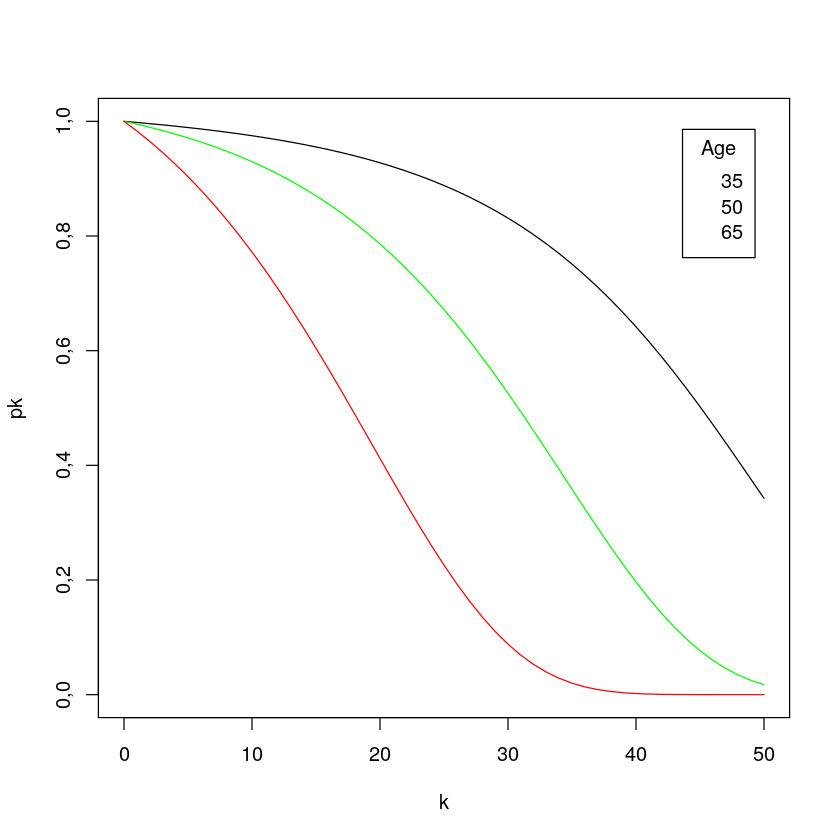

In [101]:

p = function(l0, K, theta0, theta1, theta2){
    p=exp(-theta0 - theta1*exp(theta2*l0:(l0+K-1)))
    kPlo = c(1, cumprod(p))
    return(list(0:K, kPlo))
    #plot(0:K, kPlo, "l", ylim=c(0,1))
}

l0s = c(35, 50, 65)
K = 50
theta0 = 0.0009
theta1 = 0.000044
theta2 = 0.09076

counter = 0
colors <- c("green", "red", "blue")

for (l0 in l0s){
    out = p(l0, K, theta0, theta1, theta2)
    k =  unlist(out[1])
    pk=  unlist(out[2])
    if (counter == 0){
        plot(k, pk, "l", ylim=c(0,1))#, col=colors[counter])
    }
    else{
        lines(k, pk, col=colors[counter])
    }
    
    counter = counter + 1
}
legend("topright", inset=.05, title="Age", legend=l0s, col = colors);


Age up. p down.